In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LinearRegression, SGDRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score


In [3]:
mercedes_df = pd.read_csv('train.csv')
mercedes_df.shape

(4209, 378)

In [4]:
mercedes_df.isnull().sum().any()

False

In [5]:
#droping columns with same or unique values

cols_to_drop=[]

for col in mercedes_df.columns:
    if mercedes_df[col].nunique()==1 or mercedes_df[col].nunique()== mercedes_df.shape[0]:
        cols_to_drop.append(col)

mercedes_df.drop(columns=cols_to_drop,inplace=True)


In [6]:
mercedes_df.shape

(4209, 365)

In [7]:
#assigning y to the output variable
y = mercedes_df['y']
mercedes_df.drop(columns='y',inplace=True)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(mercedes_df,y, test_size = 0.2, random_state=42)
X_train.shape

(3367, 364)

In [9]:
# extracting categorcial and continous columns from the dataset

cat_cols = [col for col in mercedes_df.columns if mercedes_df[col].dtype=='object']
print(cat_cols)

cont_cols = [col for col in mercedes_df.columns if mercedes_df[col].dtype!='object']

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [10]:
#One hot encoding

one_hot_train = pd.get_dummies(X_train[cat_cols])

one_hot_test = pd.get_dummies(X_test[cat_cols])

print('one hot train',one_hot_train.shape)
print('one hot test',one_hot_test.shape)

one hot train (3367, 193)
one hot test (842, 172)


In [11]:
#train test split
X_train_final,X_test_final = one_hot_train.align(one_hot_test,join='inner',axis=1,fill_value=0)

In [12]:
train = pd.concat([X_train[cont_cols], X_train_final],axis=1)
test = pd.concat([X_test[cont_cols], X_test_final],axis=1)

In [13]:
train.shape

(3367, 526)

In [14]:
#PCA

pca = PCA()
X_train_pca_df = pd.DataFrame(pca.fit_transform(train))


In [15]:
X_train_pca_df

,0,1,2,3,4,5,6,7,8,9,...,516,517,518,519,520,521,522,523,524,525
0,-1.424867,0.346277,2.255403,-1.295494,-0.202537,0.326374,-1.009018,0.226229,-0.710860,-0.710291,...,-1.121838e-16,-5.778216e-16,1.089932e-16,-1.872108e-16,-2.548943e-16,-1.507737e-16,-1.511289e-16,1.109530e-16,3.435892e-17,-1.289109e-17
1,-1.903661,-0.460068,0.541429,-0.220493,1.388780,0.645832,-1.894583,-1.113923,1.034391,-1.685986,...,-1.530405e-18,2.055243e-17,-1.311373e-18,-1.882155e-18,-1.290769e-17,-7.697255e-19,5.230781e-18,1.851916e-19,3.440580e-18,2.418882e-18
2,0.849868,-1.014941,2.092395,-1.214463,-1.984194,-0.318872,-0.134642,-0.083395,-0.070592,-0.015086,...,2.615076e-17,-5.076323e-17,6.379037e-17,-2.114306e-18,-1.128832e-16,-4.513030e-17,-1.790568e-17,-1.435060e-17,4.491752e-17,-1.410956e-18
3,1.011577,-0.136095,1.235652,1.394447,2.743233,0.154447,2.366444,0.826946,-0.559201,0.104867,...,1.729349e-17,-3.846339e-17,-7.518667e-17,-1.048333e-16,9.304817e-17,-5.299758e-17,-2.695146e-17,4.318521e-17,1.707374e-17,-2.387109e-17
4,0.723062,3.242660,-0.279800,2.646604,-0.389615,0.025216,-0.143376,-0.680529,1.343321,-1.510109,...,8.236641e-17,-1.010635e-15,1.988126e-16,-1.912495e-16,3.598611e-16,4.456890e-16,-2.621459e-17,-2.489671e-16,-4.444541e-16,8.342260e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,0.271964,3.722134,0.459076,1.432390,-0.628192,-0.201609,0.599084,-0.709444,-0.042012,-0.557504,...,-2.094334e-17,1.849159e-17,7.100280e-17,-3.751896e-17,-6.666165e-17,7.887722e-18,-4.622093e-17,2.539075e-18,6.615204e-18,1.615100e-18
3363,-0.976473,-1.494344,0.383828,1.685147,-1.452619,3.477378,-0.107409,0.360961,-0.979873,-0.333589,...,3.223118e-17,1.854944e-16,2.873069e-17,-2.666884e-17,4.581178e-17,-3.359791e-17,1.796653e-17,-4.168135e-17,7.764788e-17,1.216923e-17
3364,1.194655,-1.170132,-1.868314,0.115036,-0.026436,-0.505110,0.091842,2.162145,1.183716,-0.698462,...,3.474617e-17,4.545543e-17,5.461752e-17,1.567132e-17,-6.081033e-17,-2.177586e-17,-8.195067e-19,1.648733e-17,9.265469e-18,-1.096957e-17
3365,0.541083,-0.448701,-2.190700,0.342848,-0.763806,-0.939608,-0.885576,0.781549,0.591045,0.846652,...,-8.998747e-17,1.205772e-16,-6.652207e-17,1.257547e-16,2.789706e-17,1.881125e-17,-1.396960e-17,1.011789e-17,-3.942448e-17,1.198221e-17


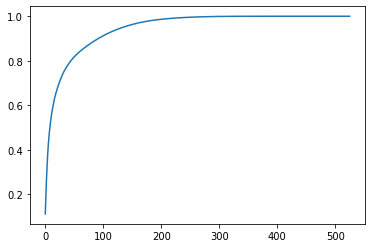

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [17]:
pca.explained_variance_ratio_

array([1.11898147e-01, 7.94613680e-02, 7.41967186e-02, 5.91643012e-02,
       5.02970144e-02, 4.14251322e-02, 3.29512980e-02, 2.85200636e-02,
       2.54188384e-02, 2.11664119e-02, 2.06491766e-02, 1.74752299e-02,
       1.51348659e-02, 1.40627877e-02, 1.38944126e-02, 1.30826593e-02,
       1.22189969e-02, 1.07667964e-02, 9.90155142e-03, 9.08741416e-03,
       8.94658281e-03, 8.48943648e-03, 8.17731675e-03, 7.65312754e-03,
       7.35842200e-03, 6.93404325e-03, 6.77311138e-03, 6.61527105e-03,
       6.37024426e-03, 6.24204299e-03, 5.81406651e-03, 5.41130778e-03,
       5.12140429e-03, 4.80682706e-03, 4.72671146e-03, 4.44387947e-03,
       4.34915651e-03, 4.24691406e-03, 4.11810367e-03, 3.96192360e-03,
       3.84165631e-03, 3.74619103e-03, 3.63018521e-03, 3.51291375e-03,
       3.44501318e-03, 3.31995256e-03, 3.20549725e-03, 3.14618395e-03,
       2.97587438e-03, 2.87093580e-03, 2.76983194e-03, 2.76020527e-03,
       2.66530143e-03, 2.58513332e-03, 2.52484053e-03, 2.51329771e-03,
      

In [18]:
pca_1 = PCA(n_components = 50)
X_train_pca_df = pd.DataFrame(pca_1.fit_transform(train), columns=list(range(0,50)))
X_test_pca_df = pd.DataFrame(pca_1.transform(test))

In [19]:
# variance_inflation_factor

vif_pca = pd.DataFrame()
vif_pca['VIF Factor PCA'] = [variance_inflation_factor(X_train_pca_df.values,i) for i in range(X_train_pca_df.shape[1])]
vif_pca['column name'] = X_train_pca_df.columns
vif_pca

,VIF Factor PCA,column name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [20]:
#Linear Regression

linear = LinearRegression()
linear.fit(X_train_pca_df,y_train)

train_pred = linear.predict(X_train_pca_df)
test_pred = linear.predict(X_test_pca_df)

print('train',linear.score(X_train_pca_df,y_train))
print('test',linear.score(X_test_pca_df,y_test))
print('r2_score',r2_score(y_test,test_pred))

train 0.5283721597838934
test 0.5429695971676742
r2_score 0.5429695971676742


In [21]:
#Lasso 

lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(train,y_train)
coeff = lasso_reg.coef_
print(lasso_reg.score(train,y_train))
print(lasso_reg.score(test,y_test))

0.597525982770432
0.5973447660559783


In [22]:
#Decision Tree

pca_tree = DecisionTreeRegressor()
pca_tree.fit(X_train_pca_df,y_train)
print('X_train_pred',pca_tree.predict(X_train_pca_df))
print('X test pca predict', pca_tree.predict(X_test_pca_df))


X_train_pred [88.96 89.9  92.59 ... 92.18 91.92 87.71]
X test pca predict [ 95.81        89.88       111.48        77.36       105.36
 141.39        87.3         97.24        99.58       109.08
  75.38        96.52        98.37        99.95        92.02
  93.77       120.18        93.52        97.7        109.04
 123.705       89.89       110.07        99.01        97.37
 117.03        87.33        86.19        90.56        88.11
  88.93       105.55        93.08        95.87       109.13
 140.49       100.44        90.69        91.99       100.12
 106.14       112.46       139.07       139.08        95.01
  86.61       128.37        98.02       108.82       103.505
  87.63        99.95       102.56       106.4         86.25
  89.06        94.81       116.93        88.92        91.32
 110.07        74.77        93.8         98.25        81.06
  91.62        86.48        91.56       103.505       95.59
  99.56        87.22        89.11       106.64        91.9375
 112.88       113.86   

In [23]:
#GridSearchCV for Random Forest 

rf = RandomForestRegressor(random_state=42)

param_dict={'n_estimators': [20,60,80],
           'max_depth':[4,6,7],
           'min_samples_split':[2,3,4],
           'max_features':['auto','sqrt','log2']}

gcv = GridSearchCV(rf,param_grid=param_dict,cv=5,verbose=5)
gcv.fit(X_train_pca_df,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.315, total=   1.9s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.418, total=   1.6s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.483, total=   1.6s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.433, total=   1.7s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=20, score=0.397, total=   1.9s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60, score=0.318, total=   5.3s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60, score=0.420, total=   5.3s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60, score=0.485, total=   5.5s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60, score=0.434, total=   5.7s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=60, score=0.401, total=   5.6s
[CV] ma

[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.358, total=   1.1s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.383, total=   1.1s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.355, total=   1.0s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=60, score=0.316, total=   1.0s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=80 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=80, score=0.260, total=   1.4s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=80 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=80, score=0.360, total=   1.3s
[CV] ma

[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=60, score=0.347, total=   0.8s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=60 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=60, score=0.293, total=   0.8s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=80, score=0.233, total=   1.1s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=80, score=0.334, total=   1.0s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=80, score=0.361, total=   1.1s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=80, score=0.351, total=   1.0s
[CV] ma

[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.356, total=  10.3s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.493, total=  10.1s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.529, total=  10.2s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.496, total=  10.4s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=80, score=0.451, total=  10.3s
[CV] max_depth=6, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=auto, min_samples_split=3, n_estimators=20, score=0.352, total=   2.6s
[CV] ma

[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=80, score=0.480, total=   1.7s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=80, score=0.448, total=   1.8s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=80 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=80, score=0.416, total=   1.7s
[CV] max_depth=6, max_features=sqrt, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=3, n_estimators=20, score=0.321, total=   0.5s
[CV] max_depth=6, max_features=sqrt, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=3, n_estimators=20, score=0.425, total=   0.4s
[CV] max_depth=6, max_features=sqrt, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=3, n_estimators=20, score=0.489, total=   0.4s
[CV] ma

[CV]  max_depth=6, max_features=log2, min_samples_split=2, n_estimators=80, score=0.378, total=   1.4s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20, score=0.293, total=   0.3s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20, score=0.424, total=   0.3s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20, score=0.446, total=   0.3s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20, score=0.410, total=   0.3s
[CV] max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, max_features=log2, min_samples_split=3, n_estimators=20, score=0.391, total=   0.4s
[CV] ma

[CV]  max_depth=7, max_features=auto, min_samples_split=3, n_estimators=20, score=0.501, total=   3.3s
[CV] max_depth=7, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=7, max_features=auto, min_samples_split=3, n_estimators=20, score=0.534, total=   3.1s
[CV] max_depth=7, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=7, max_features=auto, min_samples_split=3, n_estimators=20, score=0.500, total=   3.2s
[CV] max_depth=7, max_features=auto, min_samples_split=3, n_estimators=20 
[CV]  max_depth=7, max_features=auto, min_samples_split=3, n_estimators=20, score=0.466, total=   3.3s
[CV] max_depth=7, max_features=auto, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=auto, min_samples_split=3, n_estimators=60, score=0.361, total=   8.8s
[CV] max_depth=7, max_features=auto, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=auto, min_samples_split=3, n_estimators=60, score=0.505, total=   8.7s
[CV] ma

[CV]  max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=20, score=0.478, total=   0.5s
[CV] max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=20 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=20, score=0.441, total=   0.5s
[CV] max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=60, score=0.338, total=   1.4s
[CV] max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=60, score=0.470, total=   1.4s
[CV] max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=60, score=0.498, total=   1.4s
[CV] max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=60, score=0.478, total=   1.6s
[CV] ma

[CV]  max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60, score=0.314, total=   1.1s
[CV] max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60, score=0.444, total=   1.1s
[CV] max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60, score=0.489, total=   1.1s
[CV] max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60, score=0.442, total=   1.2s
[CV] max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_features=log2, min_samples_split=3, n_estimators=60, score=0.412, total=   1.2s
[CV] max_depth=7, max_features=log2, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_features=log2, min_samples_split=3, n_estimators=80, score=0.314, total=   1.4s
[CV] ma

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 19.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [24]:
rf_pred = gcv.predict(X_test_pca_df)

print('r2 score for random forest', r2_score(y_test,rf_pred))

r2 score for random forest 0.49261059767458226


In [26]:
#RandomizedSearchCV for Random forest

rf = RandomForestRegressor(random_state=42)
para_rf = {'n_estimators': [120,160,180],
           'max_depth':[4,6,7],
           'min_samples_split':[2,3,4],
           'max_features':['auto','sqrt','log2']}

rscv = RandomizedSearchCV(rf,param_distributions=para_rf, cv=5, verbose=5, n_iter=170)
rscv.fit(X_train_pca_df,y_train)
rf_rcv_pred = rscv.predict(X_test_pca_df)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4, score=0.321, total=   9.8s
[CV] n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV]  n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4, score=0.422, total=  10.0s
[CV] n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.8s remaining:    0.0s


[CV]  n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4, score=0.483, total=   9.5s
[CV] n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.3s remaining:    0.0s


[CV]  n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4, score=0.435, total=   9.8s
[CV] n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   39.1s remaining:    0.0s


[CV]  n_estimators=120, min_samples_split=2, max_features=auto, max_depth=4, score=0.403, total=   9.8s
[CV] n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4, score=0.321, total=  13.0s
[CV] n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4, score=0.423, total=  12.8s
[CV] n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4, score=0.485, total=  13.8s
[CV] n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4, score=0.435, total=  12.9s
[CV] n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=auto, max_depth=4, score=0.402, total=  13

[CV]  n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.263, total=   2.4s
[CV] n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.361, total=   2.4s
[CV] n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.399, total=   2.4s
[CV] n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.371, total=   2.4s
[CV] n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.331, total=   2.4s
[CV] n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.261, total=   3

[CV]  n_estimators=160, min_samples_split=2, max_features=log2, max_depth=4, score=0.324, total=   1.6s
[CV] n_estimators=160, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=log2, max_depth=4, score=0.352, total=   1.3s
[CV] n_estimators=160, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=log2, max_depth=4, score=0.336, total=   1.2s
[CV] n_estimators=160, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=160, min_samples_split=2, max_features=log2, max_depth=4, score=0.292, total=   1.3s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=4, score=0.226, total=   1.4s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=4, score=0.320, total=   1

[CV]  n_estimators=160, min_samples_split=2, max_features=auto, max_depth=6, score=0.529, total=  12.2s
[CV] n_estimators=160, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=2, max_features=auto, max_depth=6, score=0.496, total=  13.0s
[CV] n_estimators=160, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=2, max_features=auto, max_depth=6, score=0.454, total=  13.9s
[CV] n_estimators=180, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=auto, max_depth=6, score=0.359, total=  16.2s
[CV] n_estimators=180, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=auto, max_depth=6, score=0.496, total=  16.3s
[CV] n_estimators=180, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=auto, max_depth=6, score=0.530, total=  14

[CV]  n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.449, total=   2.1s
[CV] n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=160, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.419, total=   1.9s
[CV] n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.322, total=   2.5s
[CV] n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.443, total=   2.4s
[CV] n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.483, total=   2.4s
[CV] n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.449, total=   2

[CV]  n_estimators=160, min_samples_split=2, max_features=log2, max_depth=6, score=0.383, total=   1.7s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6, score=0.297, total=   1.9s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6, score=0.414, total=   1.8s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6, score=0.450, total=   1.9s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6, score=0.417, total=   1.9s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=6, score=0.382, total=   1

[CV]  n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7, score=0.363, total=  13.1s
[CV] n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7, score=0.512, total=  13.2s
[CV] n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7, score=0.539, total=  13.3s
[CV] n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7, score=0.513, total=  13.4s
[CV] n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=auto, max_depth=7, score=0.476, total=  13.1s
[CV] n_estimators=120, min_samples_split=3, max_features=auto, max_depth=7 
[CV]  n_estimators=120, min_samples_split=3, max_features=auto, max_depth=7, score=0.360, total=   8

[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=7, score=0.465, total=   3.3s
[CV] n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=7, score=0.516, total=   2.9s
[CV] n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=7, score=0.478, total=   2.3s
[CV] n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=sqrt, max_depth=7, score=0.451, total=   2.3s
[CV] n_estimators=120, min_samples_split=3, max_features=sqrt, max_depth=7 
[CV]  n_estimators=120, min_samples_split=3, max_features=sqrt, max_depth=7, score=0.347, total=   1.6s
[CV] n_estimators=120, min_samples_split=3, max_features=sqrt, max_depth=7 
[CV]  n_estimators=120, min_samples_split=3, max_features=sqrt, max_depth=7, score=0.472, total=   1

[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=7, score=0.484, total=   2.0s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=7, score=0.449, total=   2.1s
[CV] n_estimators=180, min_samples_split=2, max_features=log2, max_depth=7 
[CV]  n_estimators=180, min_samples_split=2, max_features=log2, max_depth=7, score=0.416, total=   1.8s
[CV] n_estimators=120, min_samples_split=3, max_features=log2, max_depth=7 
[CV]  n_estimators=120, min_samples_split=3, max_features=log2, max_depth=7, score=0.320, total=   1.2s
[CV] n_estimators=120, min_samples_split=3, max_features=log2, max_depth=7 
[CV]  n_estimators=120, min_samples_split=3, max_features=log2, max_depth=7, score=0.445, total=   1.3s
[CV] n_estimators=120, min_samples_split=3, max_features=log2, max_depth=7 
[CV]  n_estimators=120, min_samples_split=3, max_features=log2, max_depth=7, score=0.489, total=   1

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 36.2min finished


r2 score for random forest 0.4959667832960051


In [28]:
print('r2 score for random forest ', r2_score(y_test,rf_rcv_pred))

r2 score for random forest  0.4959667832960051


In [30]:
#GridSearchCV for AdaBoost

adaboost = AdaBoostRegressor(random_state=42)

para_dic=({'learning_rate':[0.01,0.2,0.5],
          'n_estimators':[100,200,300]})


gcv_adaboost = GridSearchCV(adaboost,param_grid=para_dic,cv=5,verbose=5)
gcv_adaboost.fit(X_train_pca_df,y_train)
ada_grid_pred = gcv_adaboost.predict(X_test_pca_df)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=100, score=0.260, total=   7.1s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.314, total=   8.2s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.1s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.345, total=   6.5s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.6s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.310, total=   6.4s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   28.0s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.290, total=   6.3s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.277, total=  12.1s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.315, total=  12.3s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.358, total=  11.8s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.309, total=  12.2s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.288, total=  11.3s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=0.283, total=  16.8s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.9min finished


In [31]:
print('r2_scoreb for gridcv',r2_score(y_test,ada_grid_pred))

r2_scoreb for gridcv 0.35736648827887296


In [32]:
#RandomizedSearchCV for Adaboost

rcv_adaboost = RandomizedSearchCV(adaboost,param_distributions=para_dic, cv=5, verbose=5, n_iter=50)
rcv_adaboost.fit(X_train_pca_df,y_train)
ada_rcv_pred = rcv_adaboost.predict(X_test_pca_df)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, learning_rate=0.01, score=0.260, total=   7.5s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.314, total=   6.8s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.345, total=   5.9s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.1s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.310, total=   6.3s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.4s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.290, total=   6.4s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  n_estimators=200, learning_rate=0.01, score=0.277, total=  12.9s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  n_estimators=200, learning_rate=0.01, score=0.315, total=  12.1s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  n_estimators=200, learning_rate=0.01, score=0.358, total=  13.6s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  n_estimators=200, learning_rate=0.01, score=0.309, total=  12.8s
[CV] n_estimators=200, learning_rate=0.01 ............................
[CV]  n_estimators=200, learning_rate=0.01, score=0.288, total=  14.0s
[CV] n_estimators=300, learning_rate=0.01 ............................
[CV]  n_estimators=300, learning_rate=0.01, score=0.283, total=  19.6s
[CV] n_estimators=300, learning_rate=0.01 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.0min finished


In [33]:
print('r2_score for rcv', r2_score(y_test,ada_rcv_pred))

r2_score for rcv 0.35736648827887296


In [34]:
#GridSearchCV for GradientBoost

gbr = GradientBoostingRegressor(random_state=42)

param_dict = ({'n_estimators':[40,60,80],
               'learning_rate':[0.1,0.5,1]})

gb_gcv = GridSearchCV(gbr,param_grid=param_dict,cv=5,verbose=5)
gb_gcv.fit(X_train_pca_df,y_train)
gb_pred = gb_gcv.predict(X_test_pca_df)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.1, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. learning_rate=0.1, n_estimators=40, score=0.365, total=   2.7s
[CV] learning_rate=0.1, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=40, score=0.510, total=   2.5s
[CV] learning_rate=0.1, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=40, score=0.536, total=   2.7s
[CV] learning_rate=0.1, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=40, score=0.501, total=   2.8s
[CV] learning_rate=0.1, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.5s remaining:    0.0s


[CV] .. learning_rate=0.1, n_estimators=40, score=0.473, total=   2.5s
[CV] learning_rate=0.1, n_estimators=60 ..............................
[CV] .. learning_rate=0.1, n_estimators=60, score=0.366, total=   3.8s
[CV] learning_rate=0.1, n_estimators=60 ..............................
[CV] .. learning_rate=0.1, n_estimators=60, score=0.526, total=   3.6s
[CV] learning_rate=0.1, n_estimators=60 ..............................
[CV] .. learning_rate=0.1, n_estimators=60, score=0.544, total=   4.0s
[CV] learning_rate=0.1, n_estimators=60 ..............................
[CV] .. learning_rate=0.1, n_estimators=60, score=0.519, total=   3.9s
[CV] learning_rate=0.1, n_estimators=60 ..............................
[CV] .. learning_rate=0.1, n_estimators=60, score=0.480, total=   3.5s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] .. learning_rate=0.1, n_estimators=80, score=0.365, total=   4.8s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.0min finished


In [35]:
print('GradientBoostRegressor r2 score',r2_score(y_test,gb_pred))

GradientBoostRegressor r2 score 0.5224494886332259


In [36]:
# SGDRegressor

sgd_reg = SGDRegressor(verbose=2)

sgd_reg.fit(train,y_train)


-- Epoch 1
Norm: 22.82, NNZs: 525, Bias: 5.026920, T: 3367, Avg. loss: 55.022812
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 23.98, NNZs: 525, Bias: 5.378561, T: 6734, Avg. loss: 40.518569
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 24.61, NNZs: 525, Bias: 5.568539, T: 10101, Avg. loss: 38.818637
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 25.20, NNZs: 525, Bias: 5.718068, T: 13468, Avg. loss: 37.811682
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 25.57, NNZs: 525, Bias: 5.796726, T: 16835, Avg. loss: 37.016627
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 26.31, NNZs: 525, Bias: 5.986157, T: 20202, Avg. loss: 36.505784
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 26.63, NNZs: 525, Bias: 6.056312, T: 23569, Avg. loss: 36.284947
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 26.81, NNZs: 525, Bias: 6.075480, T: 26936, Avg. loss: 35.888202
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 27.05, NNZs: 525, Bias: 6.127385, T: 30303, Avg. 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=2,
             warm_start=False)